In [52]:
# import and preprocess data
%matplotlib inline
from pu_preprocessing import *
rcParams['figure.figsize'] = 20, 8

d2014_states
d2015_states

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE,COUNTY,STATE
0,1-Methyl Cyclopropene,2015,41,1,0.0,0.0,Baker County,OR
1,1-Methyl Cyclopropene,2015,41,21,0.0,0.1,Gilliam County,OR
2,1-Methyl Cyclopropene,2015,41,27,0.0,1.7,Hood River County,OR
3,1-Methyl Cyclopropene,2015,41,49,0.0,0.1,Morrow County,OR
4,1-Methyl Cyclopropene,2015,41,55,0.0,0.0,Sherman County,OR
5,1-Methyl Cyclopropene,2015,41,59,0.0,5.7,Umatilla County,OR
6,1-Methyl Cyclopropene,2015,41,61,0.0,0.0,Union County,OR
7,1-Methyl Cyclopropene,2015,41,63,0.0,0.0,Wallowa County,OR
8,1-Methyl Cyclopropene,2015,41,65,0.0,0.1,Wasco County,OR
9,1-Methyl Cyclopropene,2015,53,1,0.0,10.6,Adams County,WA


In [42]:
d2014_mx = d2014_states.as_matrix()
x = d2014_mx[:, 2]   # State_Code
yl = d2014_mx[:, 4]  # LOW_ESTIMATE
yh = d2014_mx[:, 5]  # HIGH_ESTIMATE
yl.min(), yl.max(), yh.min(), yh.max()

(0.0, 5507145.8, 0.0, 5507145.8)

### VISUAL

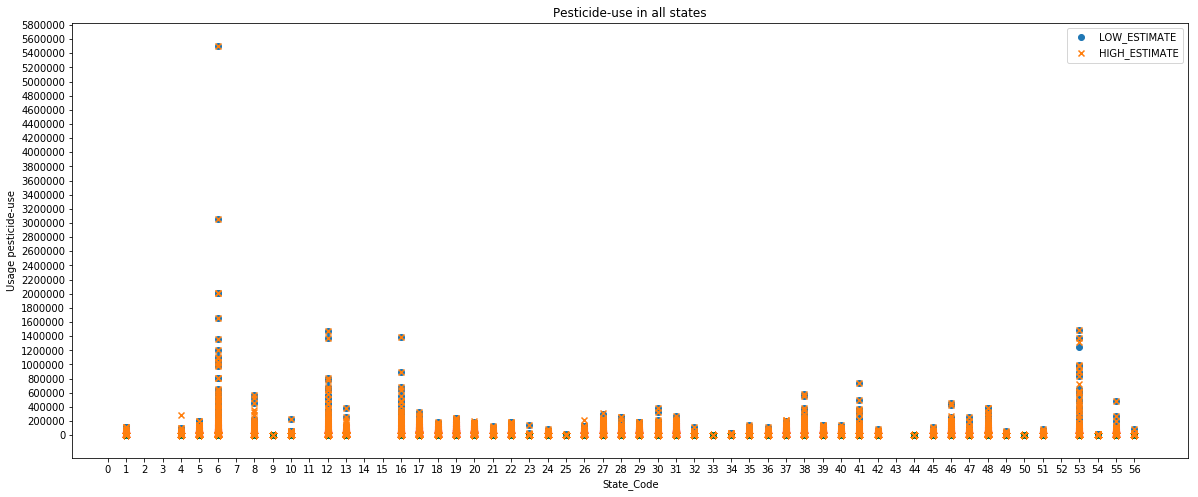

In [43]:
d2014_mx = d2014_states.as_matrix()
x = d2014_mx[:, 2]   # State_Code

yl = d2014_mx[:, 4]  # LOW_ESTIMATE
plt.scatter(x, yl, label="LOW_ESTIMATE")

yh = d2014_mx[:, 5]  # HIGH_ESTIMATE
plt.scatter(x, yh, marker='x', label="HIGH_ESTIMATE")

plt.xticks(range(x.max()+1))
plt.yticks(range(0, 6000000, 200000))
plt.xlabel("State_Code")
plt.ylabel("Usage pesticide-use")
plt.title("Pesticide-use in all states in year 2014")
plt.legend()

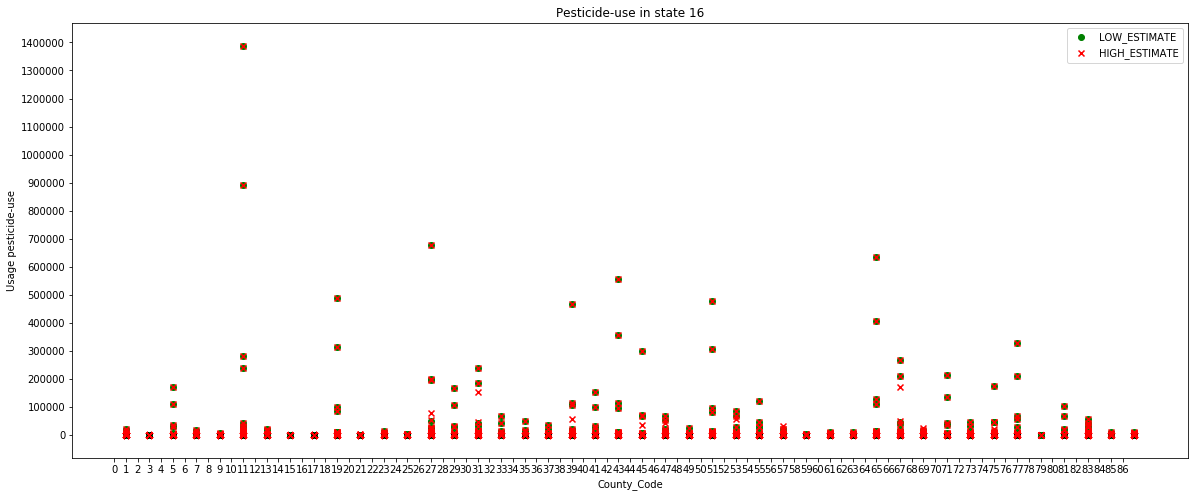

In [44]:
# Visualize the Pesticide-use at the certain state (e.g. State_Code = 16)
state_code = 16
state = d2014_states.loc[d2014_states['STATE_CODE'] == state_code]

county_code = state['COUNTY_CODE'].drop_duplicates()

state_mx = state.as_matrix()
x = state_mx[:, 3]  # County_Code

yl = state_mx[:, 4]  # LOW_ESTIMATE
yh = state_mx[:, 5]  # HIGH_ESTIMATE

plt.scatter(x, yl, label="LOW_ESTIMATE", color='green')
plt.scatter(x, yh, marker='x', label="HIGH_ESTIMATE", color='red')

plt.xticks(range(county_code.max()))
plt.yticks(range(0, 1500000, 100000))

plt.xlabel("County_Code")
plt.ylabel("Usage pesticide-use")
plt.title("Pesticide-use in state %i in year 2014" %state_code)
plt.legend()

In [47]:
# Testing: 
# filter1 = d2014_states['STATE_CODE']==1
# compound_use = d2014_states[filter1]
# filter2 = compound_use['COMPOUND']=='Mancozeb'
# compound_manco = compound_use[filter2]

# Frequency pesticide-use of which compound at every State is used most
x = d2014_states[['COMPOUND']].groupby(d2014_states['STATE_CODE']).describe()

# slicing columns multi_index
y = x.loc[:, (slice('COMPOUND'), ['top', 'freq'])]

x

COMPOUND                                
              count unique                 top freq
STATE_CODE                                         
1              9021    186            Mancozeb   67
4              2394    200            Mancozeb   15
5              6216    163          Fluroxypyr   74
6              6756    311          Glyphosate   57
8              5816    179        Aminopyralid   63
9              1031    130            Mancozeb    8
10              307    137            Mancozeb    3
12             9167    217               2,4-D   67
13            20427    218         Metsulfuron  159
16             7158    216           Clethodim   44
17            14236    180            Alachlor  102
18            13378    201             Dicamba   92
19            12469    157           Mefenoxam   99
20            12328    170            Mancozeb  105
21            15476    177            Paraquat  120
22             5119    151           Triclopyr   64
23             1416    103            Mancozeb   16
24             3210    185            Mancozeb   23
25             1671    136            Mancozeb   14
26            13982    213          Glyphosate   83
27            12452    192          Clopyralid   87
28             8832    171        Azoxystrobin   82
29            13872    183     Prothioconazole  114
30             5642    175          Sethoxydim   56
31            10613    170   Zeta-Cypermethrin   93
32             1753    199  Cyhalothrin-Lambda   17
33             1067    107            Mancozeb   10
34             2850    164            Mancozeb   20
35             3486    205          Glyphosate   33
36             8576    178            Mancozeb   59
37            15680    213           Mefenoxam  100
38             5823    133          Glyphosate   53
39            13630    202            Mancozeb   88
40             8968    174          Hexazinone   77
41             6720    232            Mancozeb   36
42            11043    195            Mancozeb   67
44              493    103            Mancozeb    5
45             6343    198            Mancozeb   46
46             7067    145        Thiamethoxam   66
47            11785    208            Picloram   95
48            28813    213          Fluroxypyr  254
49             2889    156              2,4-DB   29
50             1757    129            Mancozeb   14
51            12730    216            Mancozeb   97
53             7869    225            Mancozeb   39
54             6567    169          Glyphosate   55
55            11680    193          Clopyralid   72
56             1855    168          Clopyralid   23

#### Interpretation of the above table: e.g. 'Mancozeb' was used mostly (counted 67) in State AL (state_code 1)

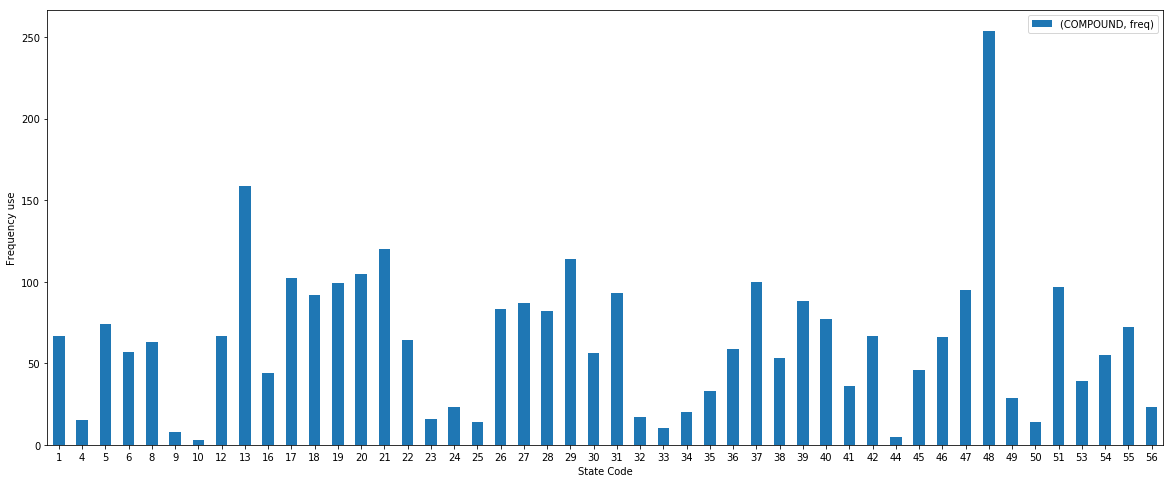

In [48]:
# Visualize result from the above table
y_freq = x.loc[:, (slice('COMPOUND'), ['freq'])]
y_freq.plot(kind='bar')
plt.xlabel("State Code")
plt.ylabel("Frequency use")
plt.xticks(rotation=0)
plt.title("Frequency pesticide-use at all states in year 2014")
plt.legend()

In [54]:
data_years = [d2014_states, d2015_states]
for dy in data_years:
    max_year_high_est, max_year_low_est, min_year_high_est, min_year_low_est = get_max_min(dy) 
    print("MAX")
    print(max_year_high_est)
    print(max_year_low_est)
    print("MIN")
    print(min_year_high_est)
    print(min_year_low_est)
    print("\n")

MAX
YEAR                2014.0
HIGH_ESTIMATE    5507145.8
dtype: float64
YEAR               2014.0
LOW_ESTIMATE    5507145.8
dtype: float64
MIN
YEAR             2014.0
HIGH_ESTIMATE       0.0
dtype: float64
YEAR            2014.0
LOW_ESTIMATE       0.0
dtype: float64


MAX
YEAR                2015.0
HIGH_ESTIMATE    2283969.1
dtype: float64
YEAR               2015.0
LOW_ESTIMATE    2283969.1
dtype: float64
MIN
YEAR             2015.0
HIGH_ESTIMATE       0.0
dtype: float64
YEAR            2015.0
LOW_ESTIMATE       0.0
dtype: float64




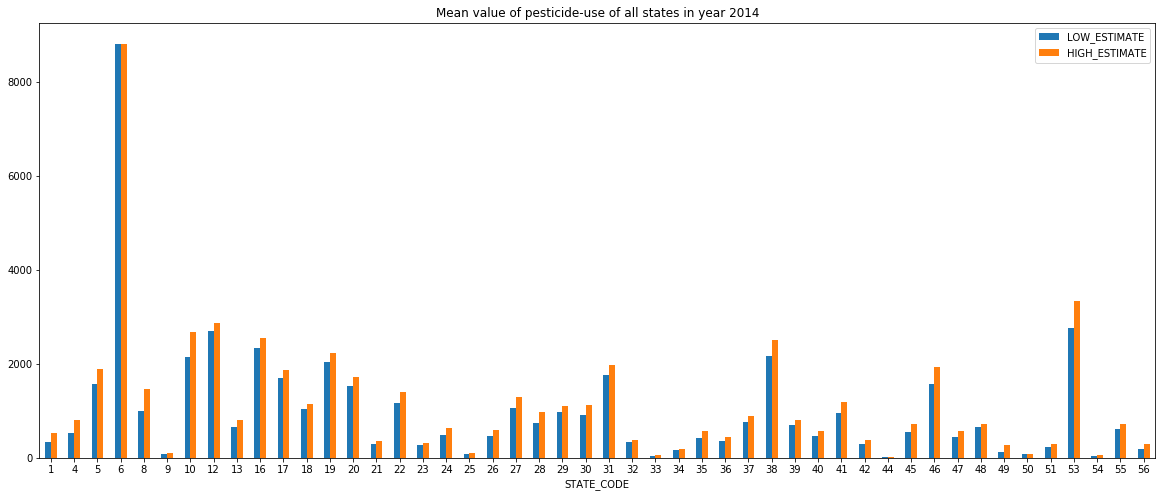

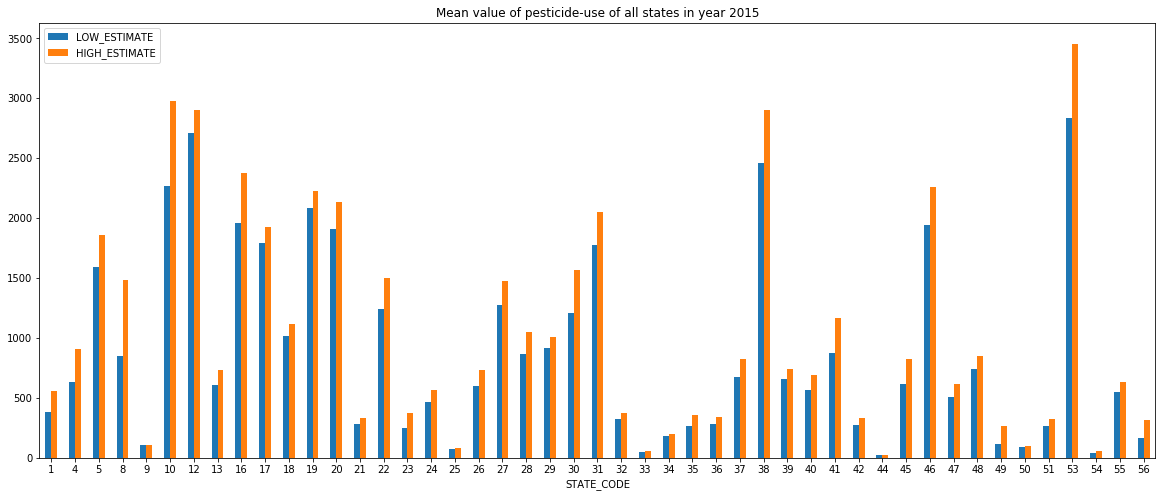

In [57]:
# mean value of pesticide-use of all states 
data2014_state_mean = get_data_state_mean_est(d2014_states)
data2014_state_mean.plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Mean value of pesticide-use of all states in year 2014")

data2015_state_mean = get_data_state_mean_est(d2015_states)
data2015_state_mean.plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Mean value of pesticide-use of all states in year 2015")
plt.legend()

In [10]:
dx14 = data2014_state_mean.index
dx15 = data2015_state_mean.index
# check whether all states reported about pesticide-use in year 2014 and year 2015
dx14.equals(dx15)

False

### Question: which states are missing ? 

In [59]:
# What state was reported in 2014 but missing in 2015 and vice versa?
dxa14 = np.array(dx14)
dxa15 = np.array(dx15)
missing_states14_15 = np.setdiff1d(dxa14, dxa15), 
missing_states15_14 = np.setdiff1d(dxa15, dxa14)
missing_states14_15, missing_states15_14

filter = states['STATE_CODE']
states[filter==missing_states14_15[0][0]]['STATE'].drop_duplicates().values[0]

'CA'

### Answer: State 'CA' (state_code '6') is missing in 2015

In [13]:
data_diff_state_mean = data2015_state_mean - data2014_state_mean
data_diff_state_mean

,LOW_ESTIMATE,HIGH_ESTIMATE
STATE_CODE,,
1,37.710514,36.321219
4,98.234205,91.015083
5,12.343171,-25.275733
6,NaN,NaN
8,-141.573703,22.309665
9,14.266237,7.323703
10,114.326815,297.114945
12,20.959911,30.334172
13,-56.229599,-82.372093


### Assume that there is no changes in pesticide-use by setting the value of state CA is 0. So we will classify the difference in 3 groups of pesticide-use (more > 0, less < 0 and no changes = 0)

Text(0.5,1,'The Differences (changes) in all States between year 2014 and year 2015')

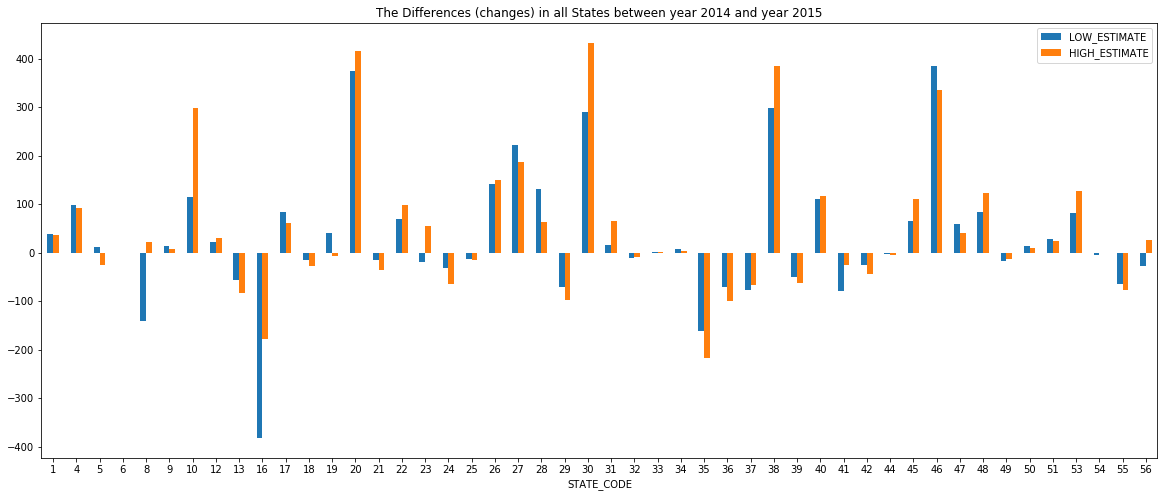

In [14]:
data_diff_state_mean[['LOW_ESTIMATE']] = data_diff_state_mean[['LOW_ESTIMATE']].replace(np.NaN, 0)
data_diff_state_mean[['HIGH_ESTIMATE']] = data_diff_state_mean[['HIGH_ESTIMATE']].replace(np.NaN, 0)
data_diff_state_mean.plot(kind='bar')
plt.xticks(rotation=0)
plt.title("The Differences (changes) in all States between year 2014 and year 2015")

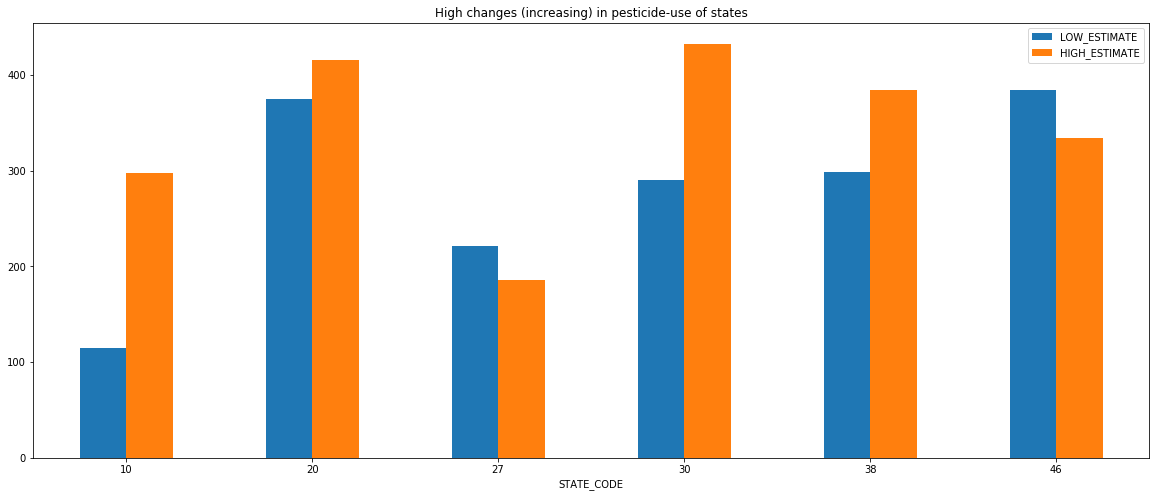

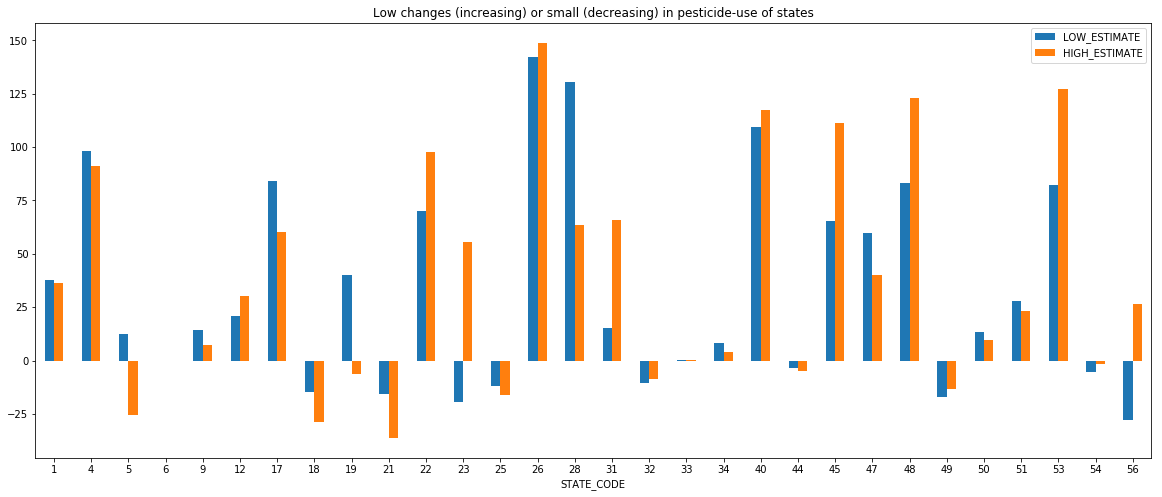

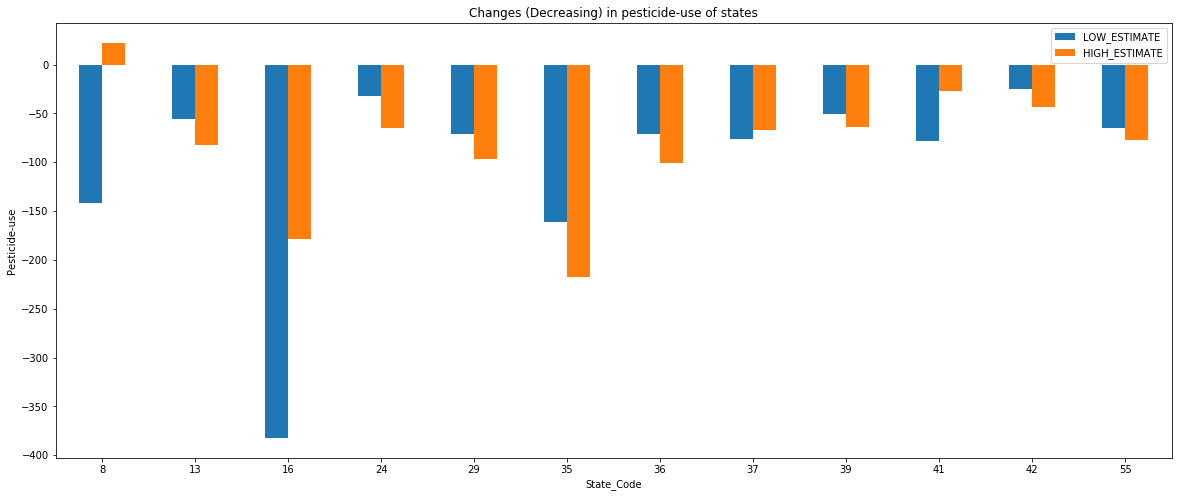

In [15]:
# Classify the differences in 3 groups (high) increases, (low) increases and decreases
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(data_diff_state_mean)

data_diff_state_mean.index[y_kmeans == 0]
data_diff_state_mean[y_kmeans == 0].plot(kind='bar')
plt.title("High changes (increasing) in pesticide-use of states")
plt.xticks(rotation=0)

data_diff_state_mean.index[y_kmeans == 1]
data_diff_state_mean[y_kmeans == 1].plot(kind='bar')
plt.title("Low changes (increasing) or small (decreasing) in pesticide-use of states")
plt.xticks(rotation=0)

data_diff_state_mean.index[y_kmeans == 2]
data_diff_state_mean[y_kmeans == 2].plot(kind='bar')
plt.title("Changes (Decreasing) in pesticide-use of states")

plt.xticks(rotation=0)
plt.xlabel('State_Code')
plt.ylabel('Pesticide-use')
plt.legend()

### Data Source: https://www.kaggle.com/usgs/pesticide-use